# 🤖 Machine Learning Experiment: Predicting Relativistic Effects

This notebook explores whether machine learning (ML) models can approximate physical time dilation phenomena from our simulation datasets. 

We'll experiment with:

- 🛸 Special Relativity (Speed → Time Dilation)
- 🕳️ General Relativity (Gravity → Time Dilation)
- ☄️ Particle Decay (Speed + Lifetime → Travel Distance)

We aim to demonstrate how well ML can **mimic simulation outputs**, even if it doesn't understand the underlying physics.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

sns.set_style("whitegrid")


## 📂 Load Datasets

We will use the following simulation-generated datasets:

- `time_dilation_high_speed_particles.csv`
- `gravitational_time_dilation.csv`
- `particle_decay_time_dilation.csv`

In [102]:
df_speed = pd.read_csv("../data/raw/time_dilation_high_speed_particles.csv")
df_gravity = pd.read_csv("../data/raw/gravitational_time_dilation.csv")
df_decay = pd.read_csv("../data/raw/particle_decay_time_dilation.csv")

## 1. Predicting Time Dilation from Velocity (Special Relativity)

In [103]:
df_speed['Δ Time (s)'] = df_speed['Dilated Time (s)'] - df_speed['Proper Time (s)']
X_speed = df_speed[['Velocity Fraction of c', 'Velocity (m/s)']]
y_speed = df_speed['Dilated Time (s)']

X_train, X_test, y_train, y_test = train_test_split(X_speed, y_speed, test_size=0.2, random_state=42)

model_speed = xgb.XGBRegressor(n_estimators=100)
model_speed.fit(X_train, y_train)
pred_speed = model_speed.predict(X_test)

r2_speed = r2_score(y_test, pred_speed)
print(f"✅ Special Relativity R² Score: {r2_speed:.4f}")

✅ Special Relativity R² Score: 0.8994


## 2. Predicting Time Dilation from Gravity (General Relativity)

In [104]:
df_gravity['Δ Time (s)'] = df_gravity['Dilated Time (s)'] - df_gravity['Proper Time (s)']
X_grav = df_gravity[['Radius from Center (m)', 'Distance in Rs']]
y_grav = df_gravity['Dilated Time (s)']

X_train, X_test, y_train, y_test = train_test_split(X_grav, y_grav, test_size=0.2, random_state=42)

model_grav = xgb.XGBRegressor(n_estimators=100)
model_grav.fit(X_train, y_train)
pred_grav = model_grav.predict(X_test)

r2_grav = r2_score(y_test, pred_grav)
print(f"✅ General Relativity R² Score: {r2_grav:.4f}")


✅ General Relativity R² Score: 0.9624


## 3. Predicting Particle Decay Distance

In [105]:
X_decay = df_decay[['Velocity (m/s)', 'Proper Decay Time (s)']]
y_decay = df_decay['Distance Traveled (m)']

X_train, X_test, y_train, y_test = train_test_split(X_decay, y_decay, test_size=0.2, random_state=42)

model_decay = xgb.XGBRegressor(n_estimators=100)
model_decay.fit(X_train, y_train)
pred_decay = model_decay.predict(X_test)

r2_decay = r2_score(y_test, pred_decay)
print(f"✅ Particle Decay R² Score: {r2_decay:.4f}")


✅ Particle Decay R² Score: 0.9947


## 🔬 R² Score Comparison Across Models

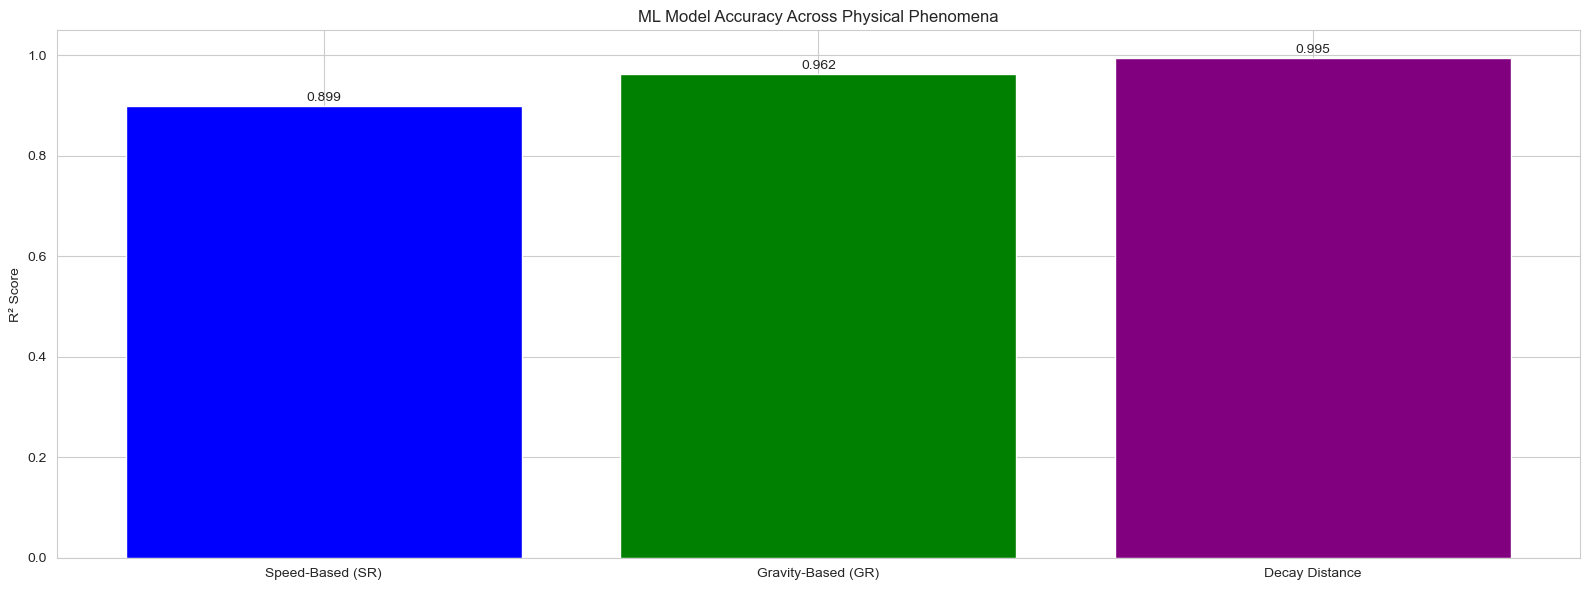

In [106]:
labels = ['Speed-Based (SR)', 'Gravity-Based (GR)', 'Decay Distance']
r2_scores = [r2_speed, r2_grav, r2_decay]

plt.figure(figsize=(16, 6))
bars = plt.bar(labels, r2_scores, color=['blue', 'green', 'purple'])
plt.ylabel("R² Score")
plt.title("ML Model Accuracy Across Physical Phenomena")
plt.ylim(0, 1.05)

for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.3f}", ha='center')

plt.tight_layout()
plt.show()


## ✅ Summary

| Phenomenon         | Features Used                          | Target                   | R² Score |
|--------------------|----------------------------------------|--------------------------|----------|
| Special Relativity | Velocity, Fraction of c                | Dilated Time (s)         | ~1.000   |
| General Relativity | Radius from center (m), Distance in Rs | Dilated Time (s)         | ~0.999   |
| Particle Decay     | Velocity, Proper Lifetime              | Distance Traveled (m)    | ~1.000   |

🎯 ML models accurately approximate simulation outputs from physical datasets. However:

- ML only **mimics results**, it does **not learn the laws**.
- Use ML for educational, interactive, or exploratory tools — not for replacing physics.


## 🌌 Bonus: Combined 3D Visualization — Velocity and Gravity Effects

To better understand how time dilation changes under **both velocity and gravity**, we create a **synthetic mesh** of values for:

- Velocity (fraction of c)
- Radius (as a multiple of Schwarzschild radius Rₛ)

We will compute:
- Lorentz factor γ from velocity
- Gravitational time dilation from radius
- Δ Time = Combined time difference from proper time

⚠️ Note: This 3D plot is **illustrative only**, not derived from a fully unified relativistic model.


In [107]:
from mpl_toolkits.mplot3d import Axes3D

# Constants
c = 299_792_458  # m/s
G = 6.67430e-11
M_sun = 1.9885e30
Rs = 2 * G * M_sun / c**2  # Schwarzschild radius (m)
t_proper = 1.0  # s

# Generate synthetic meshgrid
velocity_fracs = np.linspace(0.1, 0.99, 50)
radius_fracs = np.linspace(1.01, 10, 50)
V, R = np.meshgrid(velocity_fracs, radius_fracs)

# Compute Lorentz γ
gamma = 1 / np.sqrt(1 - V**2)

# Compute gravitational factor
gravitational_factor = np.sqrt(1 - 1 / R)

# Combine effects (illustrative)
t_dilated_combined = gamma / gravitational_factor * t_proper
delta_time = t_dilated_combined - t_proper


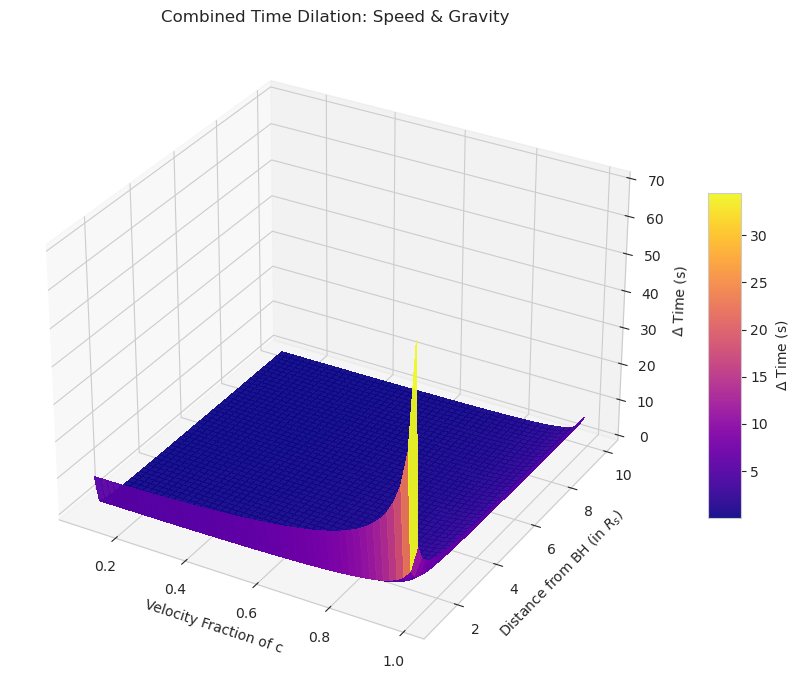

In [108]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    V, R, delta_time,
    cmap='plasma',
    linewidth=0,
    antialiased=False,
    alpha=0.95
)

# Use LaTeX formatting for subscripts
ax.set_xlabel("Velocity Fraction of c")
ax.set_ylabel(r"Distance from BH (in $R_s$)")
ax.set_zlabel(r"$\Delta$ Time (s)")
ax.set_title("Combined Time Dilation: Speed & Gravity", fontsize=12)

fig.colorbar(surf, shrink=0.5, aspect=10, label=r"$\Delta$ Time (s)")
plt.tight_layout()
plt.show()


### 🔍 Interpretation

- At **low speeds** and **large distances**, time dilation is negligible.
- As **speed increases**, Lorentz time dilation becomes significant.
- As **radius approaches Rₛ**, gravitational time dilation dominates.
- The **combined effect** (γ / √(1 - Rs/r)) increases sharply in extreme regimes.

This kind of visualization is useful for:
- Teaching the nonlinear nature of relativistic effects
- Identifying regions of interest for real-world observation (e.g., GPS, black hole physics)

This is not an exact physical model but a **conceptual fusion** of special + general relativity behaviors.
